# House Price Project

## Imports

In [63]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy.stats import skew, boxcox, yeojohnson
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import SGDRegressor
import joblib

## Load DataSet

In [2]:
df = pd.read_csv('Housing.csv')
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [3]:
new_order = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus', 'price']
df = df.reindex(columns=new_order)
df

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price
0,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,13300000
1,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,12250000
2,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,12250000
3,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,12215000
4,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,11410000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished,1820000
541,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished,1767150
542,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished,1750000
543,2910,3,1,1,no,no,no,no,no,0,no,furnished,1750000


In [4]:
df.dtypes

area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
price                int64
dtype: object

### Casting int and object to float and category

In [5]:
cols = df.columns
cols

Index(['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea',
       'furnishingstatus', 'price'],
      dtype='object')

In [6]:
for col in cols:
  if df[col].dtype == 'int64':
    df[col] = df[col].astype('float64')
  if df[col].dtype == 'object':
    df[col] = df[col].astype('category')

df.dtypes

area                 float64
bedrooms             float64
bathrooms            float64
stories              float64
mainroad            category
guestroom           category
basement            category
hotwaterheating     category
airconditioning     category
parking              float64
prefarea            category
furnishingstatus    category
price                float64
dtype: object

## Train Test Split

In [7]:
train_set, test_set = train_test_split(df, test_size=0.2)

train_set.shape, test_set.shape

((436, 13), (109, 13))

## Missing Values

<Axes: >

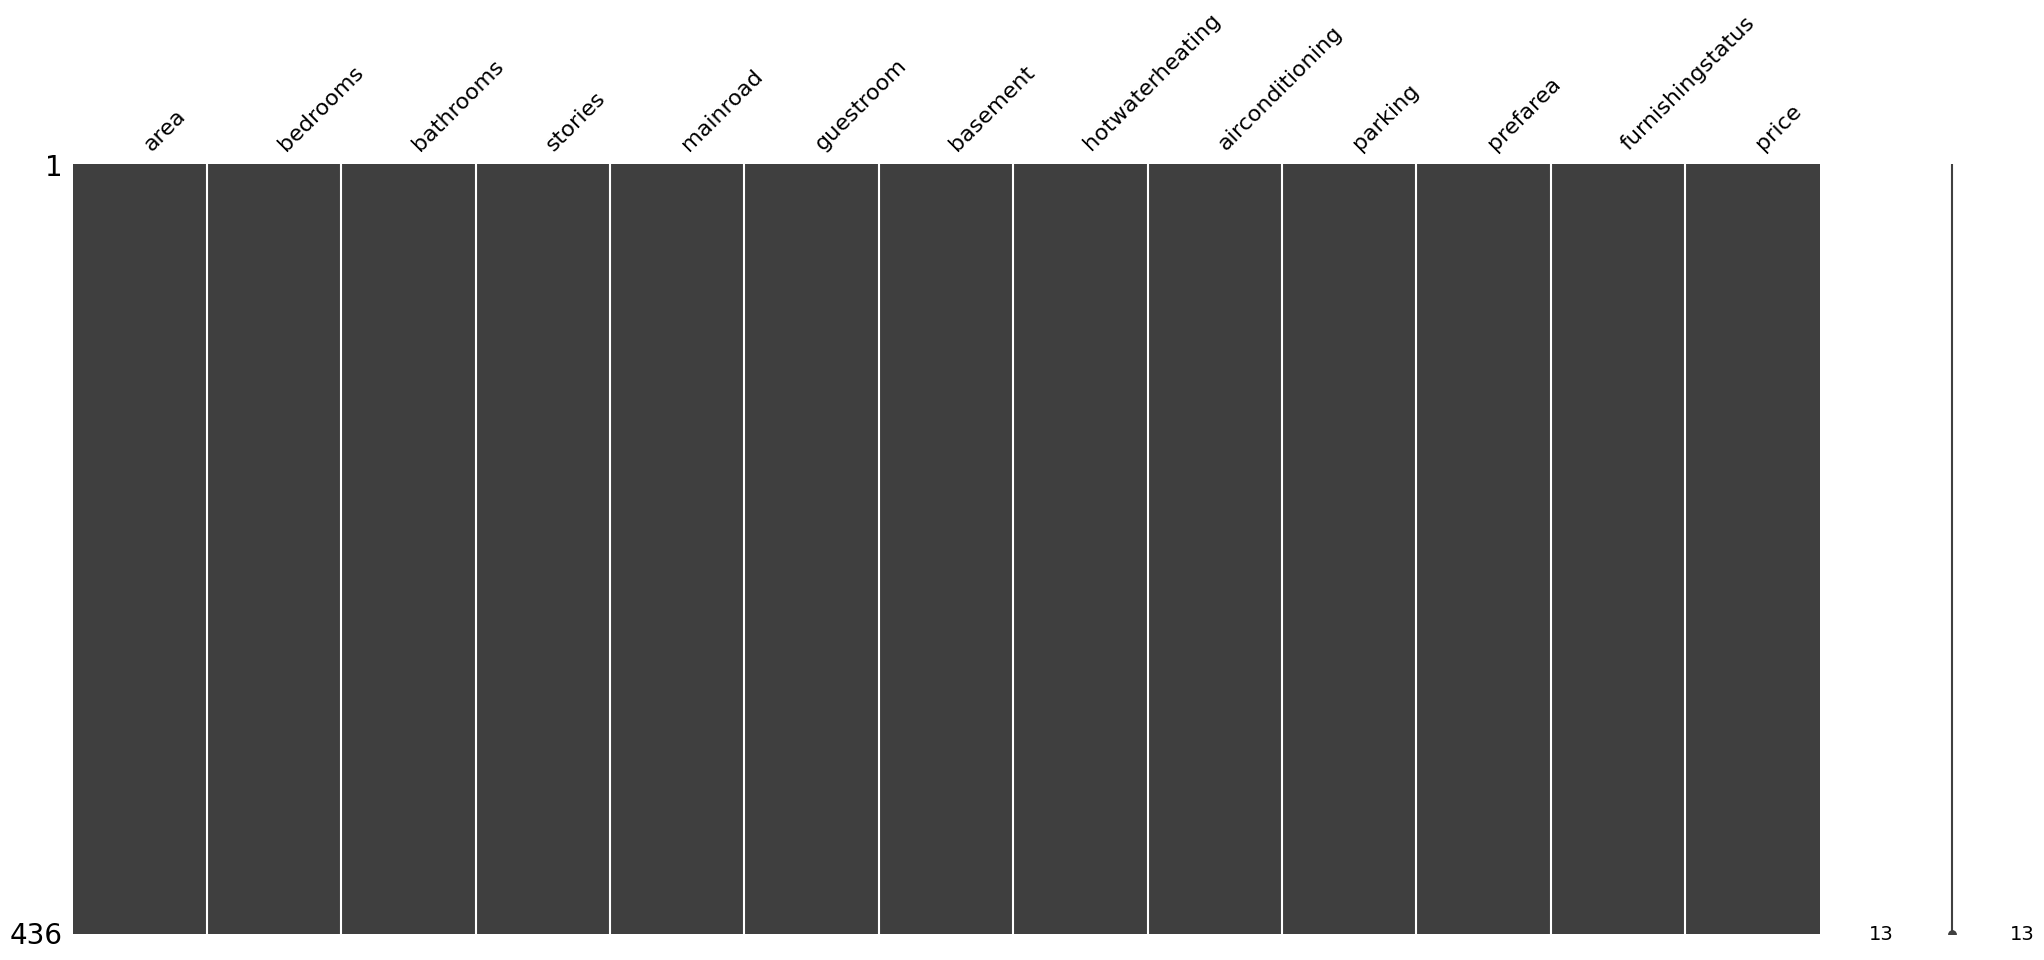

In [ ]:
msno.matrix(train_set)

In [ ]:
train_set.isna().sum()

area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
price               0
dtype: int64

## Encoding Categorical Features

In [8]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 436 entries, 451 to 174
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   area              436 non-null    float64 
 1   bedrooms          436 non-null    float64 
 2   bathrooms         436 non-null    float64 
 3   stories           436 non-null    float64 
 4   mainroad          436 non-null    category
 5   guestroom         436 non-null    category
 6   basement          436 non-null    category
 7   hotwaterheating   436 non-null    category
 8   airconditioning   436 non-null    category
 9   parking           436 non-null    float64 
 10  prefarea          436 non-null    category
 11  furnishingstatus  436 non-null    category
 12  price             436 non-null    float64 
dtypes: category(7), float64(6)
memory usage: 27.7 KB


### Label encoding

In [9]:
label_encoder = LabelEncoder()
train_set['mainroad'] = label_encoder.fit_transform(train_set['mainroad'])

In [10]:
train_set['guestroom'] = label_encoder.transform(train_set['guestroom'])
train_set

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price
451,6750.0,2.0,1.0,1.0,1,0,no,no,no,0.0,no,semi-furnished,3150000.0
333,3000.0,3.0,1.0,2.0,1,0,no,no,no,0.0,no,semi-furnished,3920000.0
134,7000.0,3.0,1.0,1.0,1,0,yes,no,no,2.0,yes,semi-furnished,5803000.0
248,4100.0,2.0,2.0,1.0,1,1,yes,no,no,0.0,no,semi-furnished,4543000.0
271,1905.0,5.0,1.0,2.0,0,0,yes,no,no,0.0,no,semi-furnished,4340000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30,7475.0,3.0,2.0,4.0,1,0,no,no,yes,2.0,no,unfurnished,8400000.0
289,5850.0,2.0,1.0,1.0,1,1,yes,no,no,2.0,no,semi-furnished,4200000.0
481,2700.0,2.0,1.0,1.0,0,0,no,no,no,0.0,no,furnished,2940000.0
59,6000.0,3.0,2.0,4.0,1,1,no,no,yes,1.0,no,furnished,7210000.0


In [11]:
cols = ['basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for col in cols:
  train_set[col] = label_encoder.transform(train_set[col])
train_set

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price
451,6750.0,2.0,1.0,1.0,1,0,0,0,0,0.0,0,semi-furnished,3150000.0
333,3000.0,3.0,1.0,2.0,1,0,0,0,0,0.0,0,semi-furnished,3920000.0
134,7000.0,3.0,1.0,1.0,1,0,1,0,0,2.0,1,semi-furnished,5803000.0
248,4100.0,2.0,2.0,1.0,1,1,1,0,0,0.0,0,semi-furnished,4543000.0
271,1905.0,5.0,1.0,2.0,0,0,1,0,0,0.0,0,semi-furnished,4340000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30,7475.0,3.0,2.0,4.0,1,0,0,0,1,2.0,0,unfurnished,8400000.0
289,5850.0,2.0,1.0,1.0,1,1,1,0,0,2.0,0,semi-furnished,4200000.0
481,2700.0,2.0,1.0,1.0,0,0,0,0,0,0.0,0,furnished,2940000.0
59,6000.0,3.0,2.0,4.0,1,1,0,0,1,1.0,0,furnished,7210000.0


In [12]:
train_set['furnishingstatus'] = label_encoder.fit_transform(train_set['furnishingstatus'])
train_set

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price
451,6750.0,2.0,1.0,1.0,1,0,0,0,0,0.0,0,1,3150000.0
333,3000.0,3.0,1.0,2.0,1,0,0,0,0,0.0,0,1,3920000.0
134,7000.0,3.0,1.0,1.0,1,0,1,0,0,2.0,1,1,5803000.0
248,4100.0,2.0,2.0,1.0,1,1,1,0,0,0.0,0,1,4543000.0
271,1905.0,5.0,1.0,2.0,0,0,1,0,0,0.0,0,1,4340000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30,7475.0,3.0,2.0,4.0,1,0,0,0,1,2.0,0,2,8400000.0
289,5850.0,2.0,1.0,1.0,1,1,1,0,0,2.0,0,1,4200000.0
481,2700.0,2.0,1.0,1.0,0,0,0,0,0,0.0,0,0,2940000.0
59,6000.0,3.0,2.0,4.0,1,1,0,0,1,1.0,0,0,7210000.0


## EDA

### single variable analysis

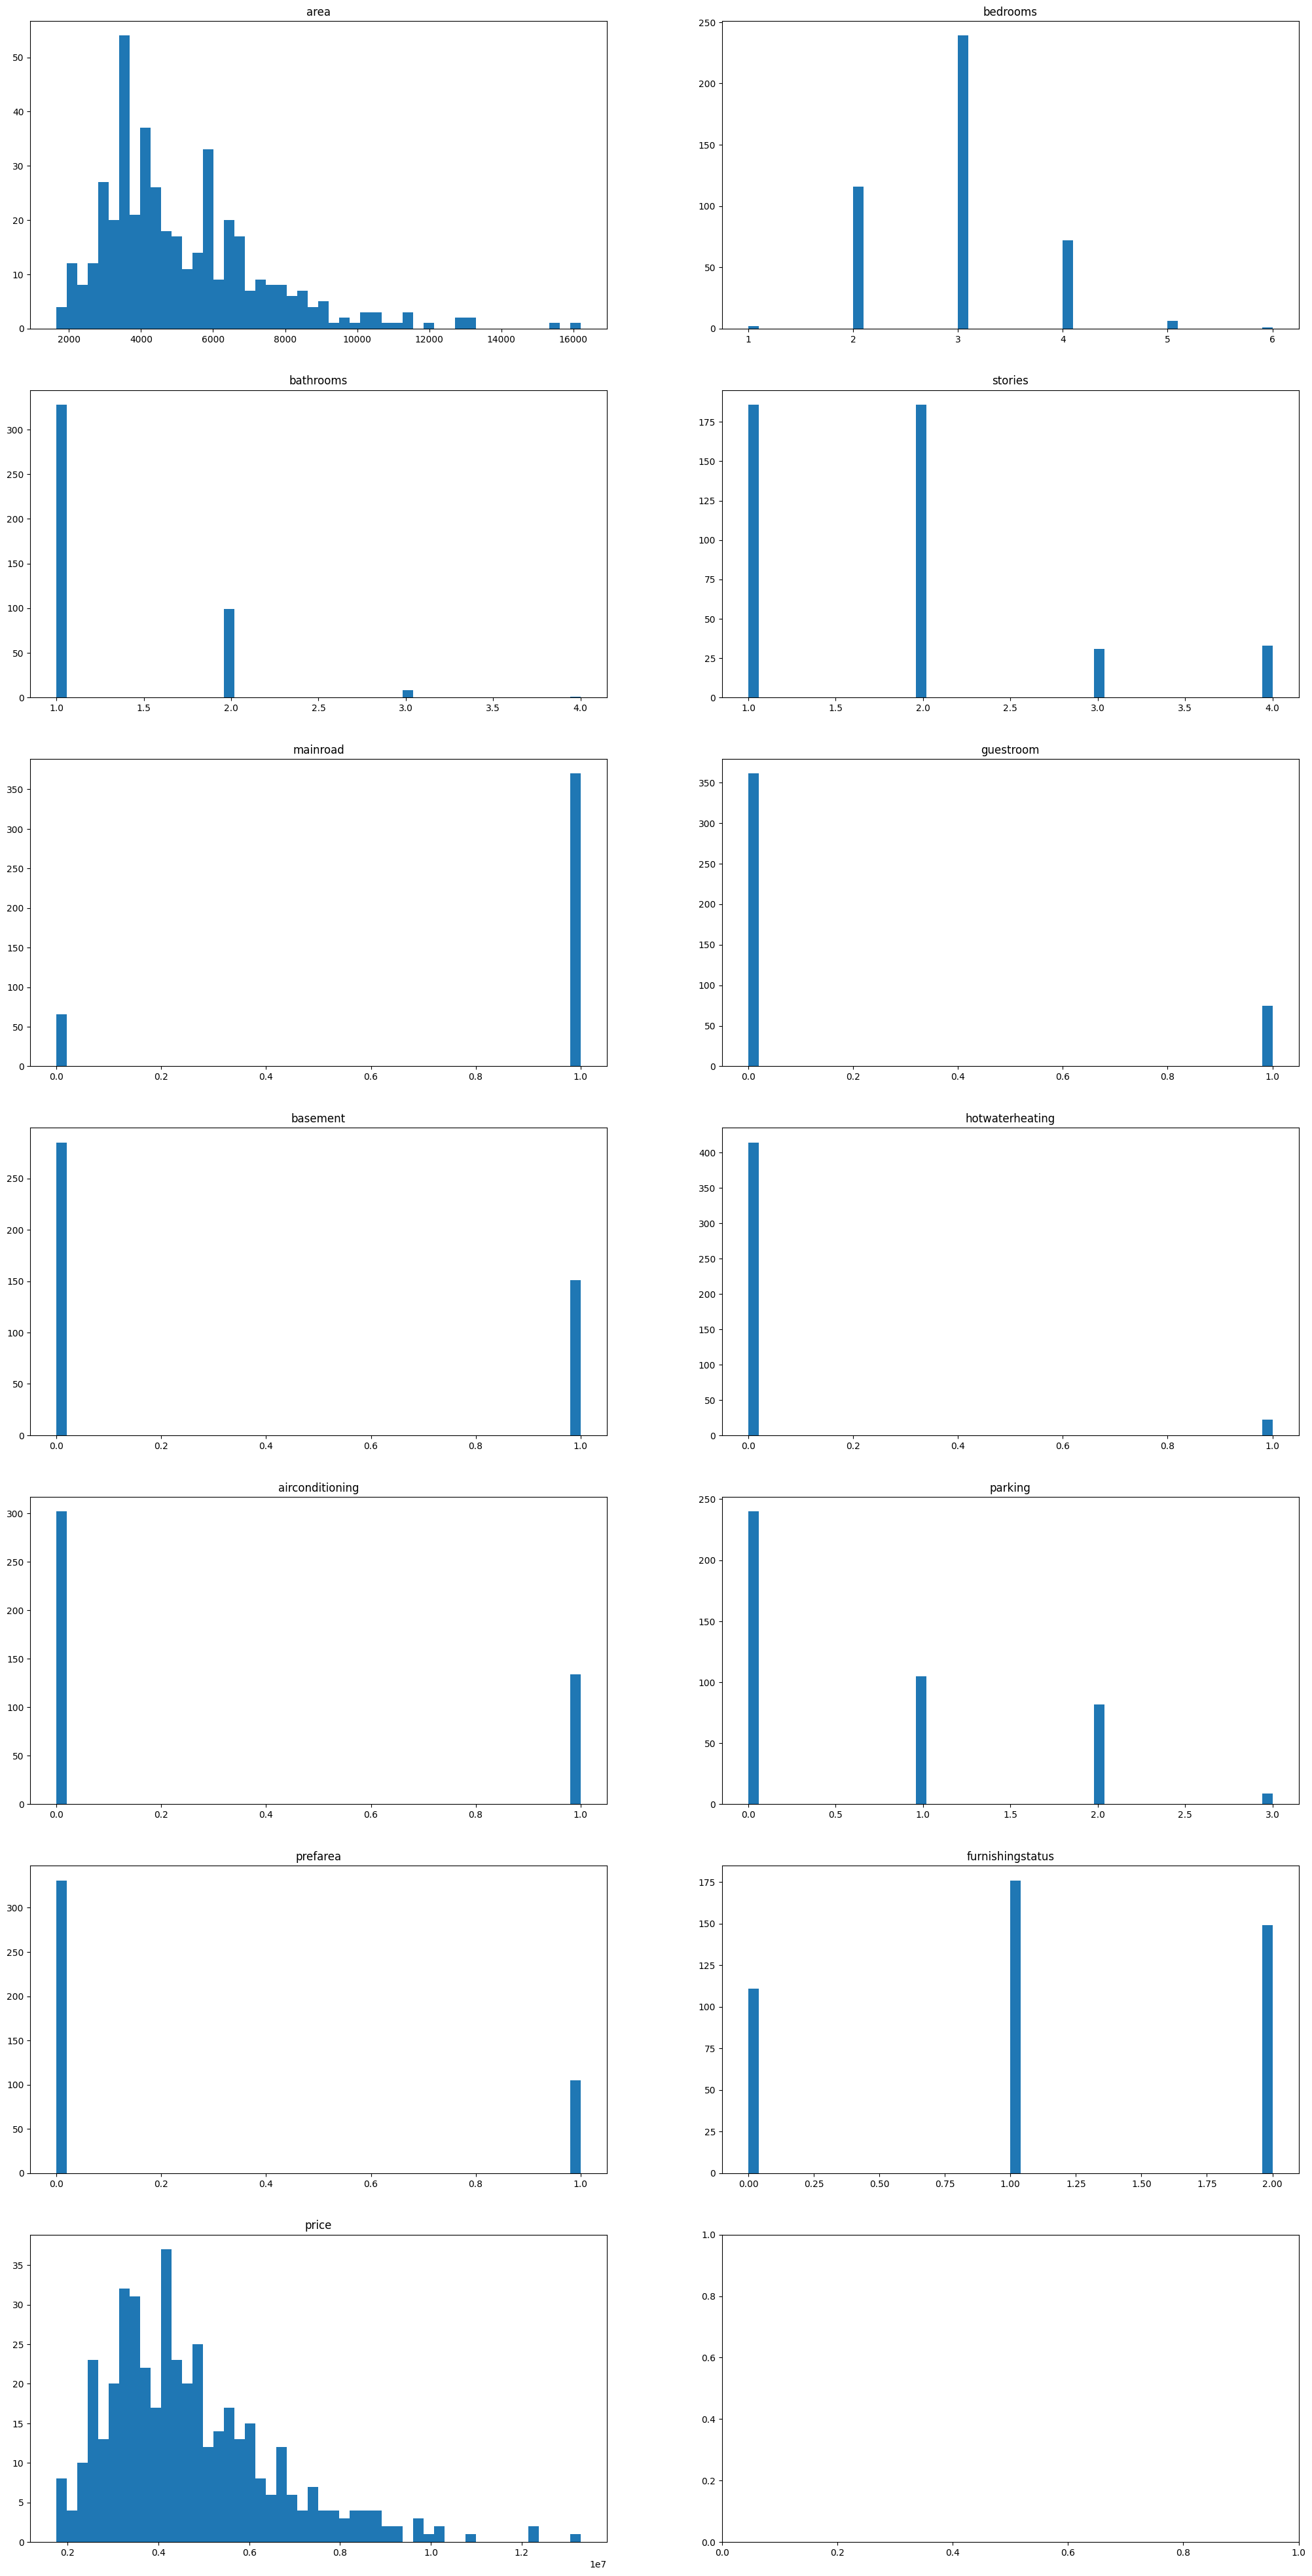

In [ ]:
fig, axes = plt.subplots(7, 2, figsize=(25, 50))
axes_flat = axes.flatten()

for i, col in enumerate(train_set.columns):
  ax = axes_flat[i]
  ax.hist(train_set[col], 50)
  ax.set_title(col)

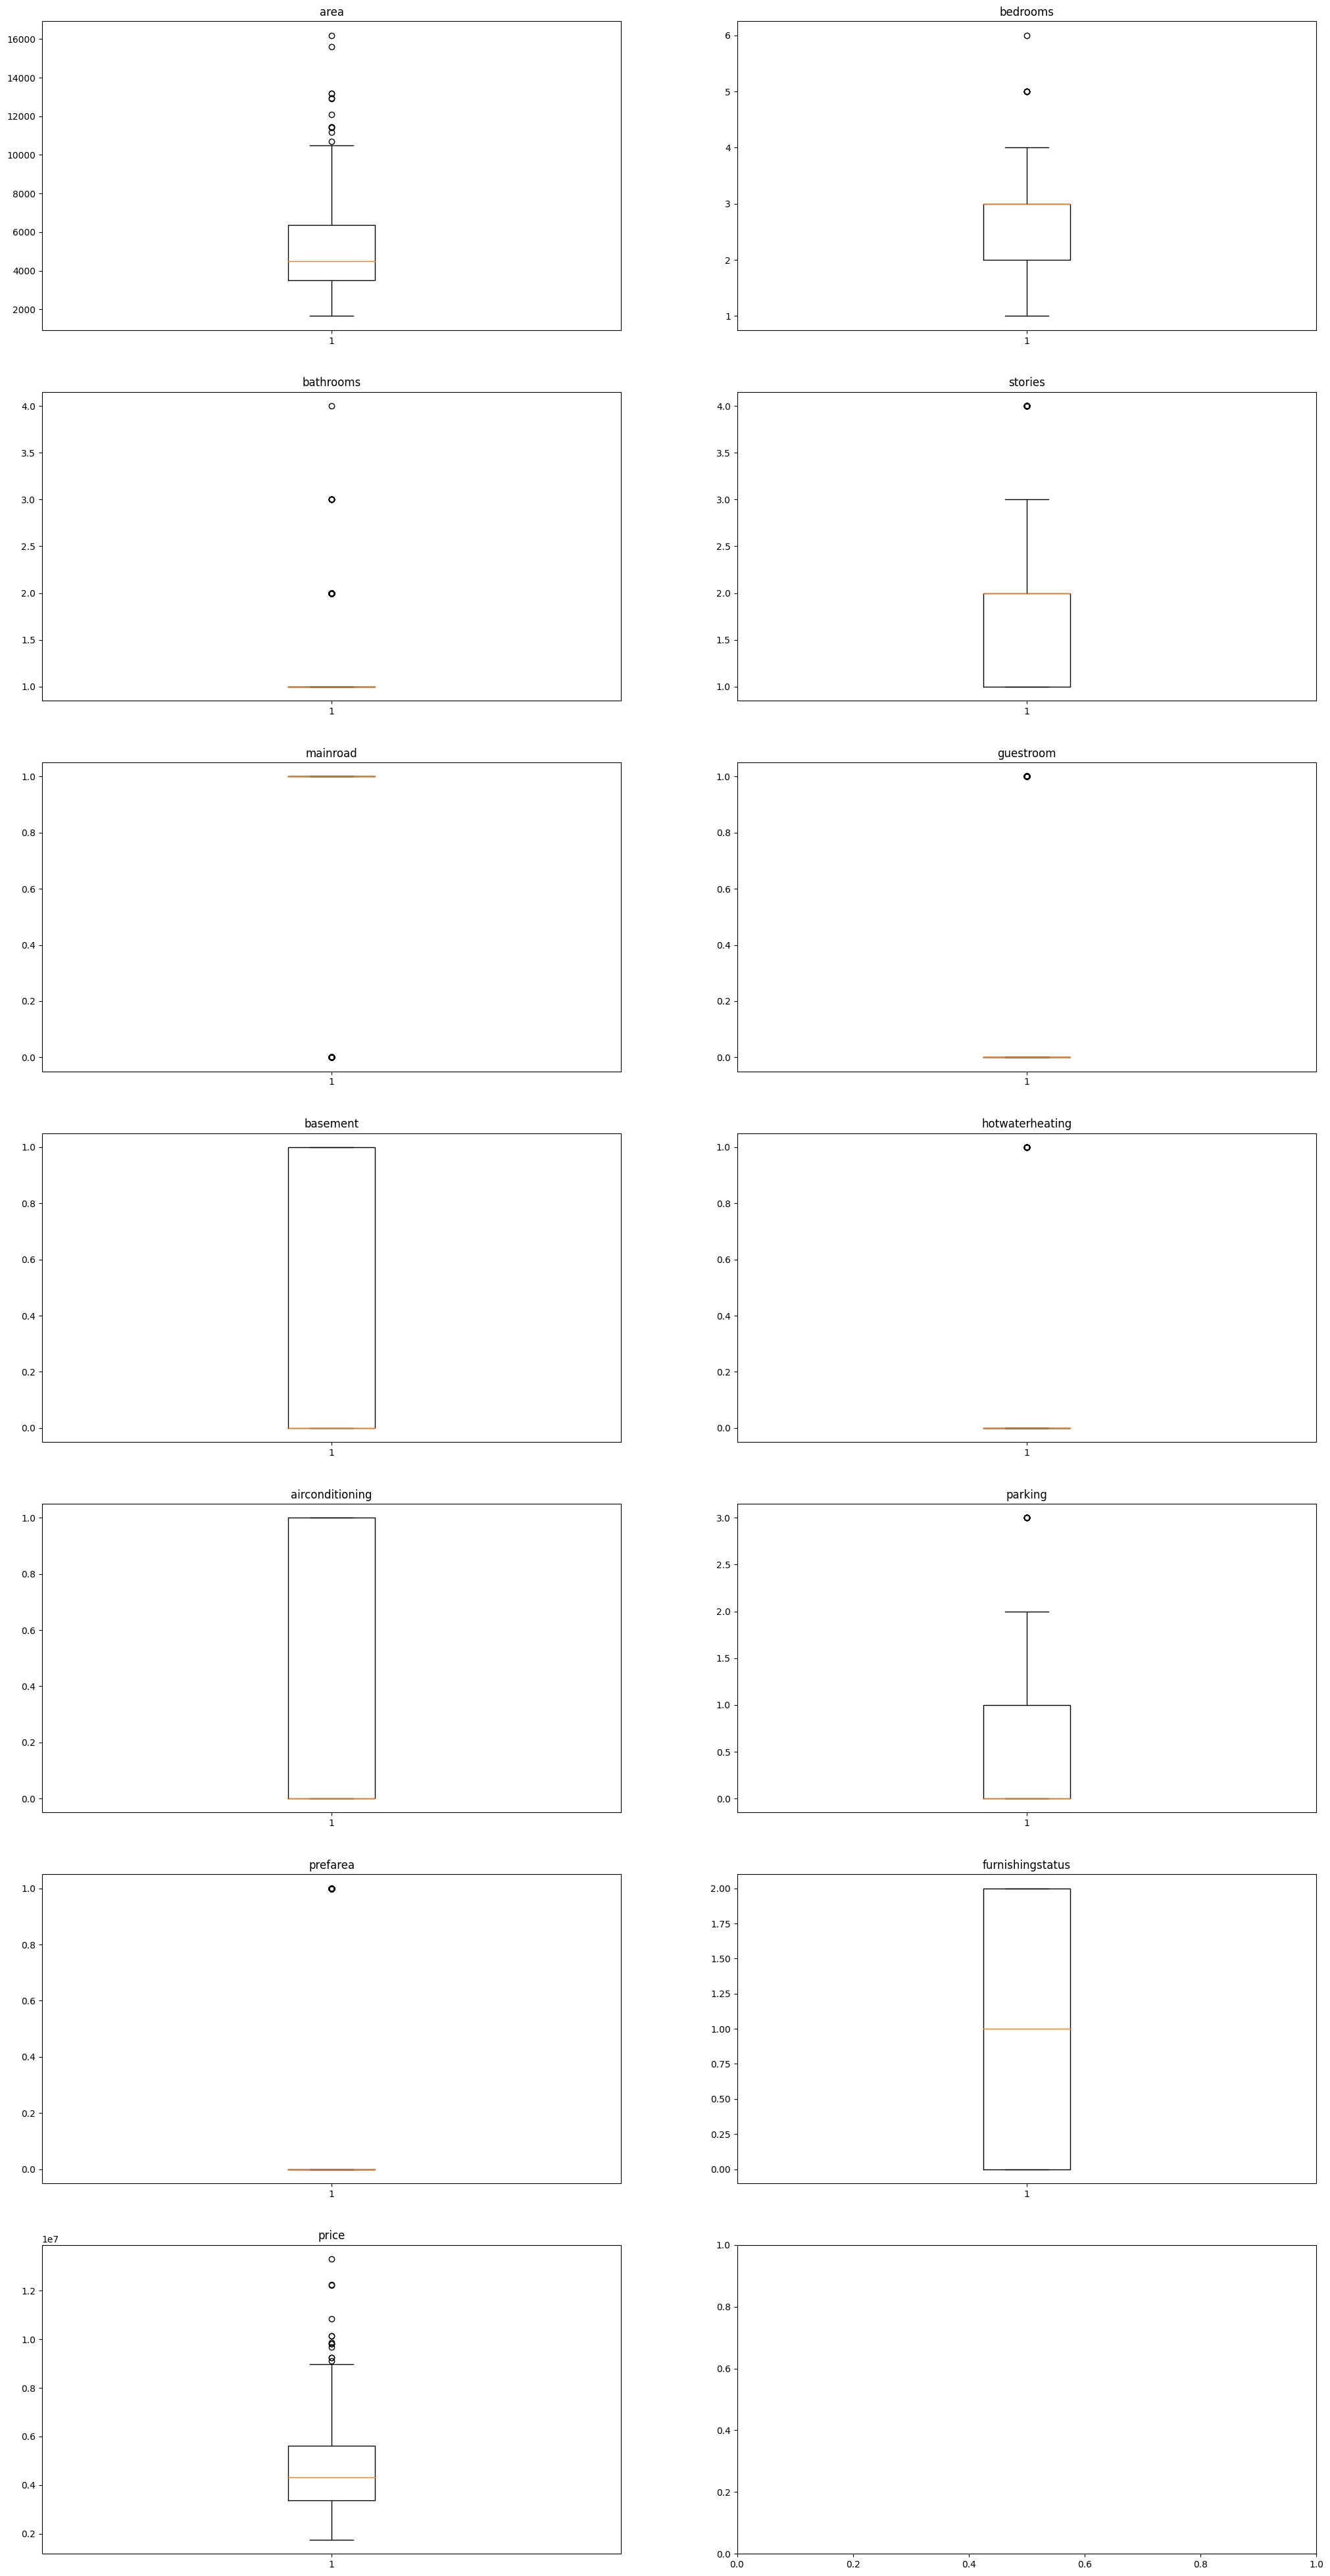

In [ ]:
fig, axes = plt.subplots(7, 2, figsize=(25, 50))
axes_flat = axes.flatten()

for i, col in enumerate(train_set.columns):
  ax = axes_flat[i]
  ax.boxplot(train_set[col])
  ax.set_title(col)

### Two variable analysis

#### Correlation

<Axes: >

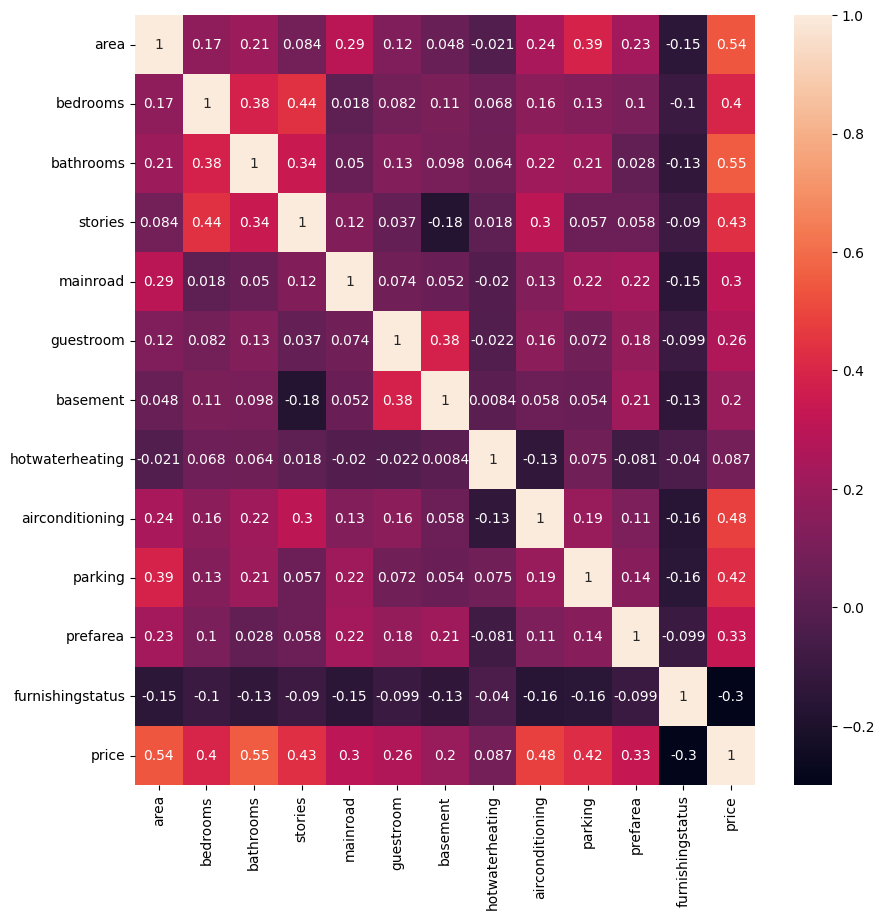

In [ ]:
plt.figure(figsize=(10, 10))
corr = train_set.corr()
sns.heatmap(corr, annot=True)

In [ ]:
corr[['price']]

,price
area,0.537962
bedrooms,0.399186
bathrooms,0.553810
stories,0.432484
mainroad,0.299704
guestroom,0.264679
basement,0.195123
hotwaterheating,0.086654
airconditioning,0.477764
parking,0.424971


In [ ]:
corr[['price']].abs().sort_values(by='price')

,price
hotwaterheating,0.086654
basement,0.195123
guestroom,0.264679
mainroad,0.299704
furnishingstatus,0.300333
prefarea,0.332428
bedrooms,0.399186
parking,0.424971
stories,0.432484
airconditioning,0.477764


#### Plots

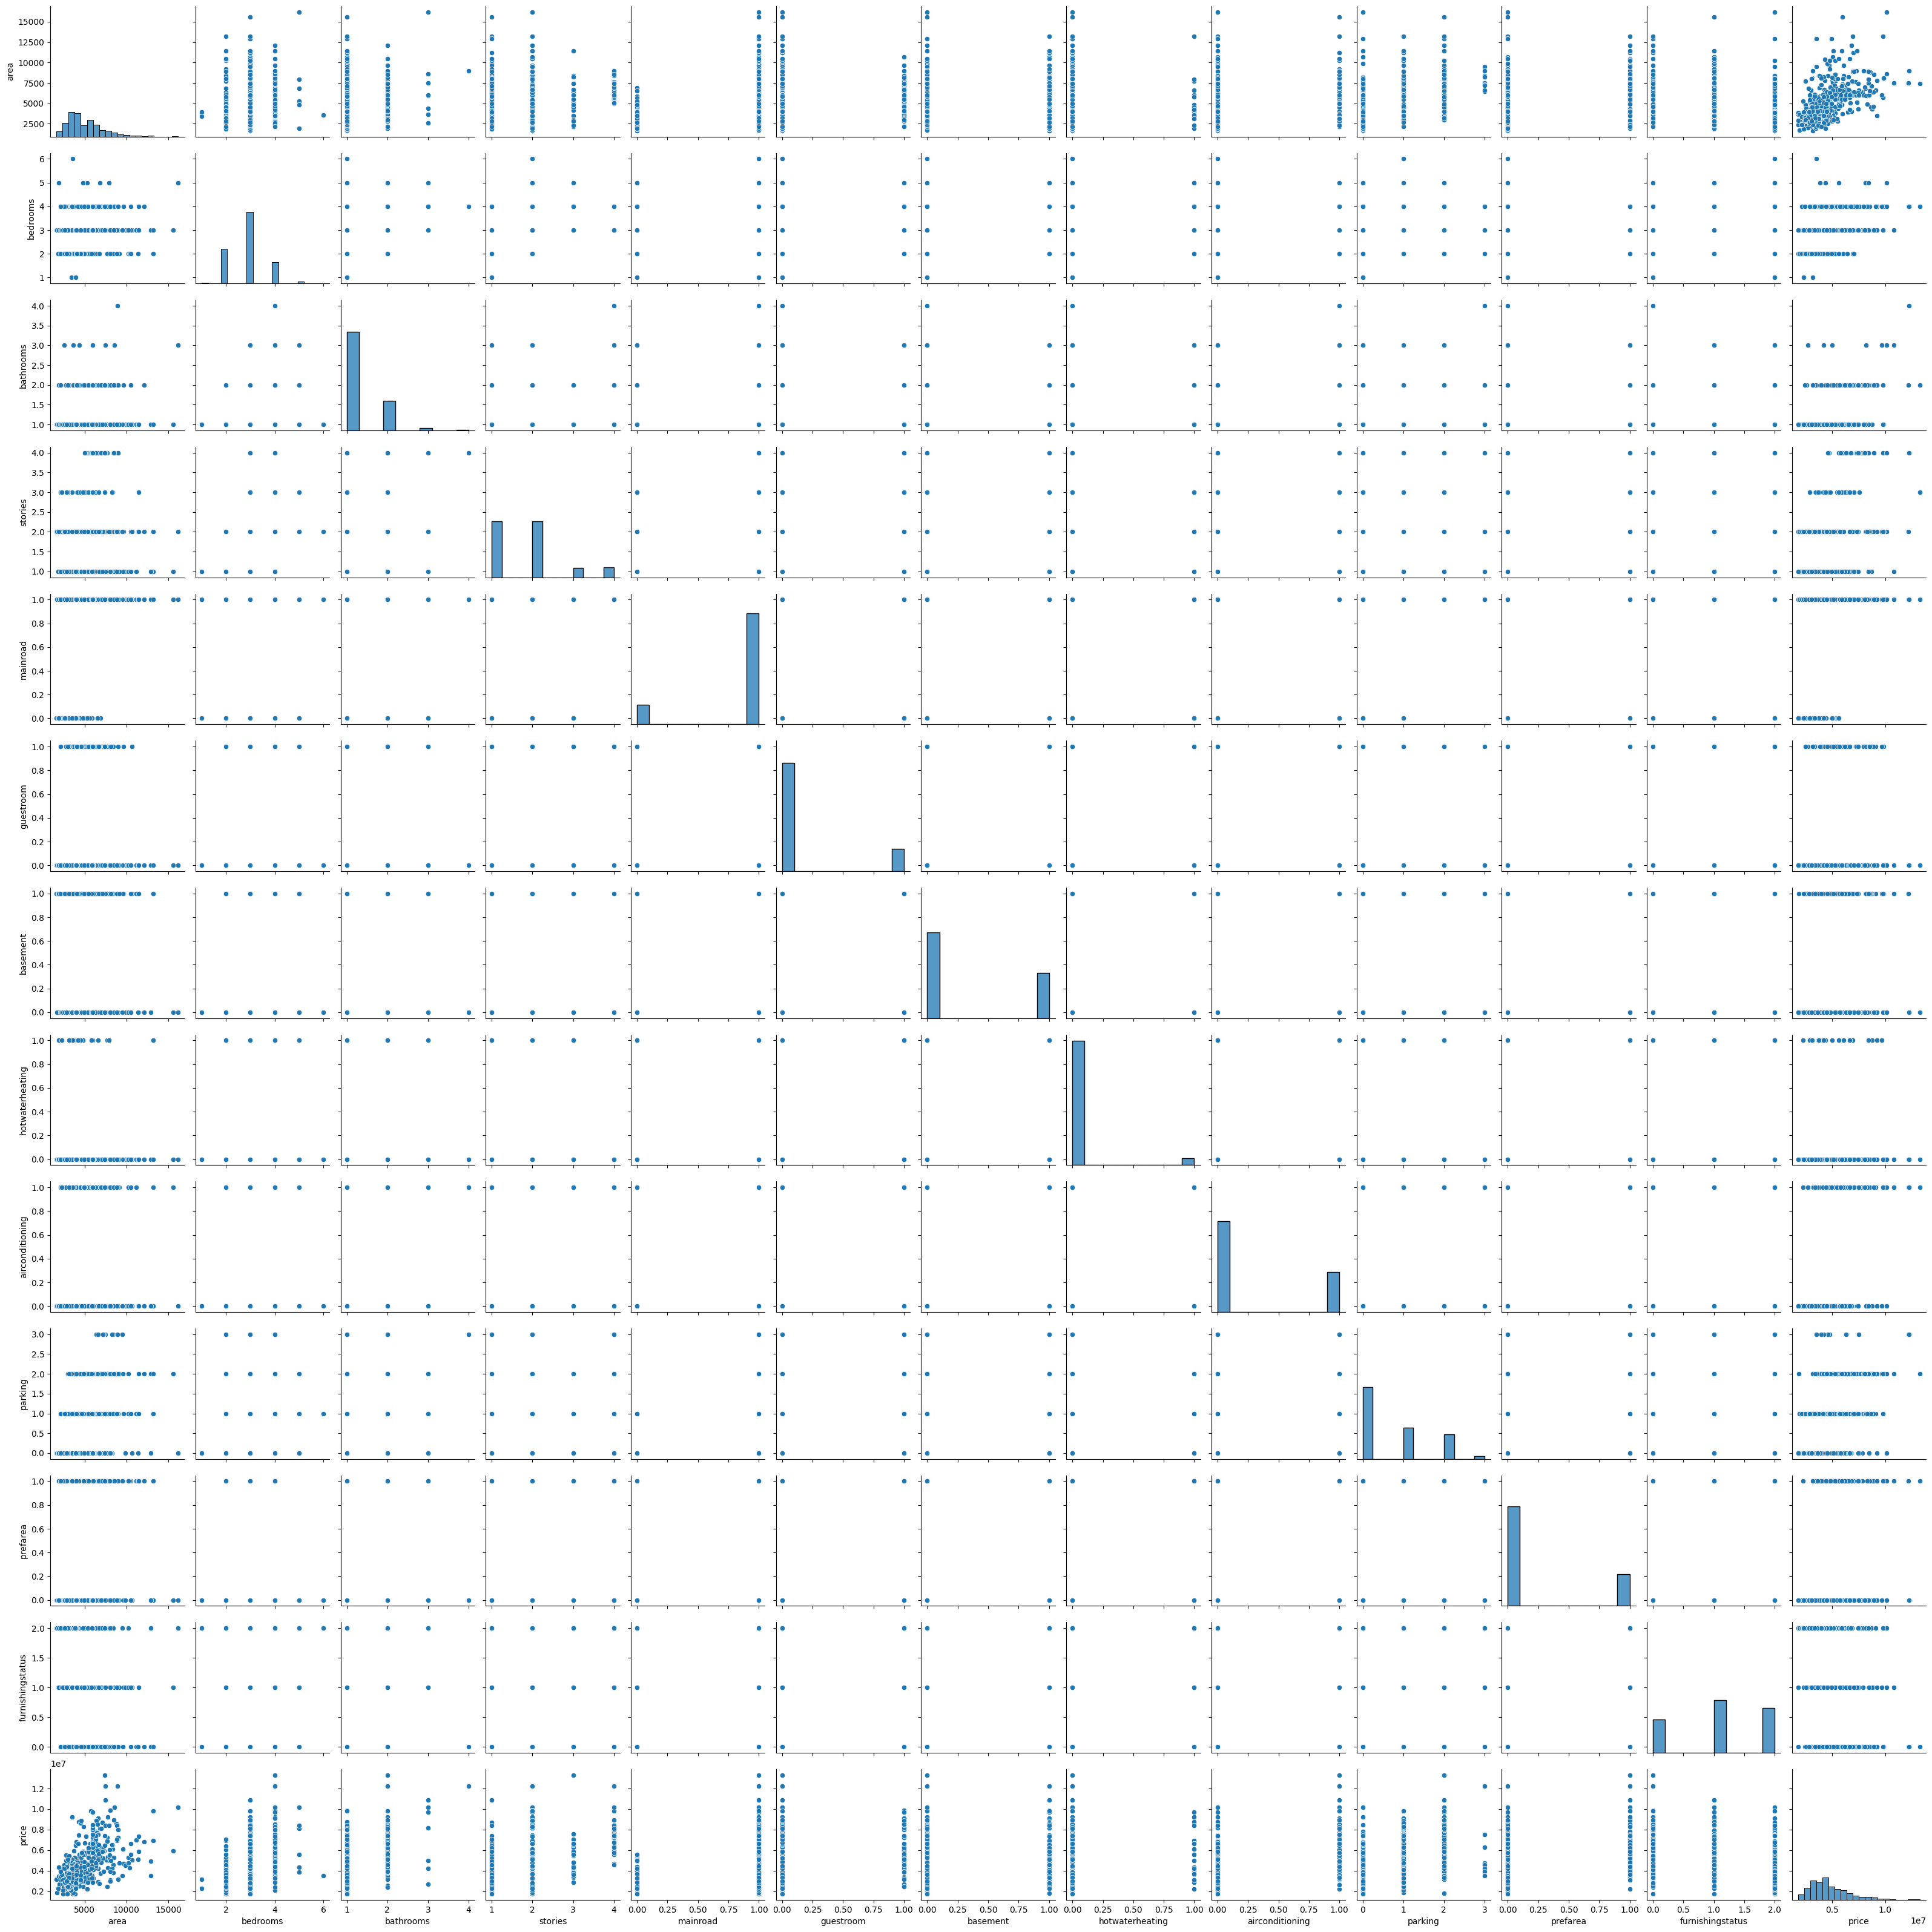

In [ ]:
sns.pairplot(train_set)

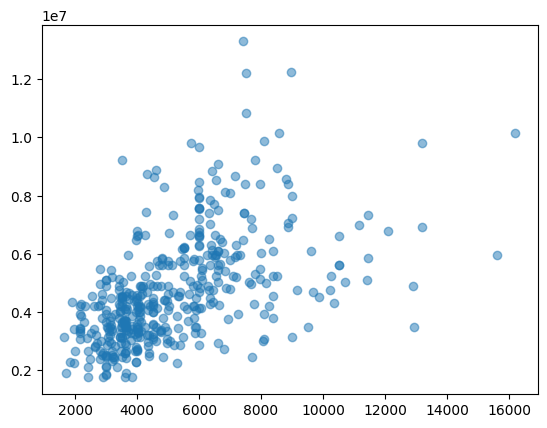

In [ ]:
plt.scatter(train_set.area, train_set.price, alpha=0.5)

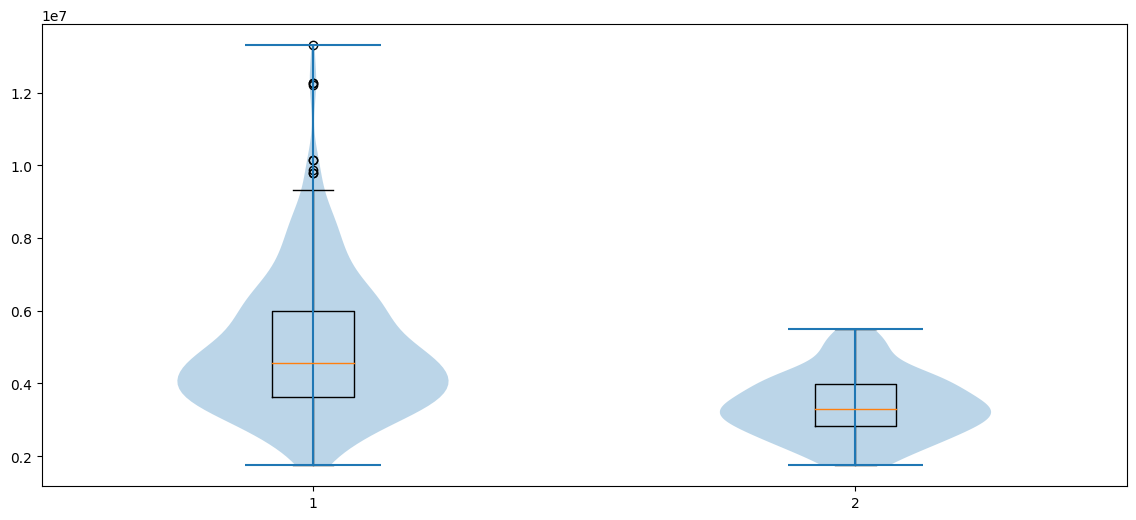

In [ ]:
plt.figure(figsize=(14, 6))
flags = train_set.mainroad.astype(np.bool_)

plt.boxplot([train_set.price[flags], train_set.price[~flags]])
plt.violinplot([train_set.price[flags], train_set.price[~flags]]);

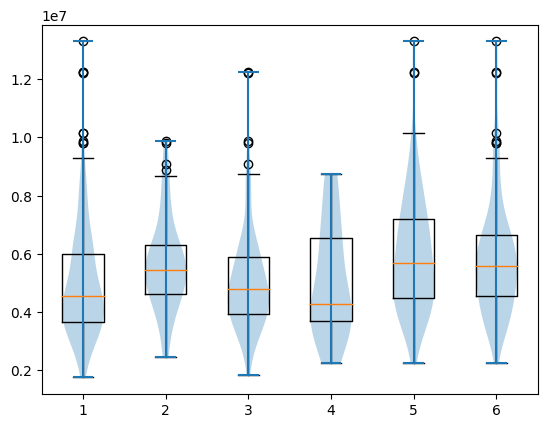

In [ ]:
cat_feature = train_set[['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']]

plt.boxplot([train_set.price[train_set[cat] == 1] for cat in cat_feature])
plt.violinplot([train_set.price[train_set[cat] == 1] for cat in cat_feature]);

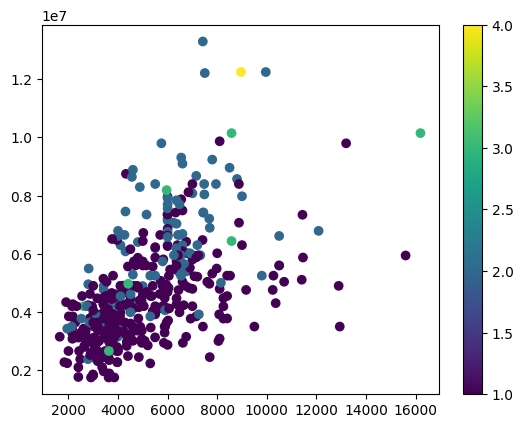

In [ ]:
plt.scatter(train_set.area, train_set.price, c=train_set.bathrooms)
plt.colorbar();

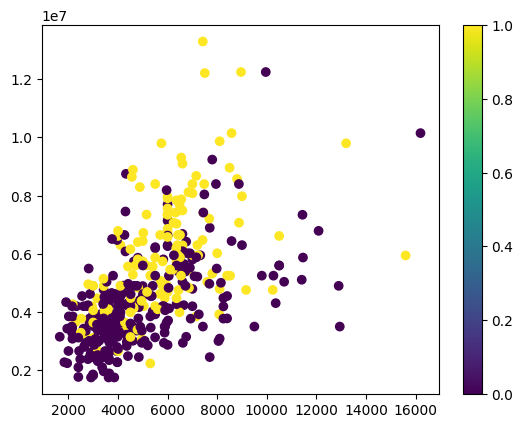

In [ ]:
plt.scatter(train_set.area, train_set.price, c=train_set.airconditioning)
plt.colorbar();

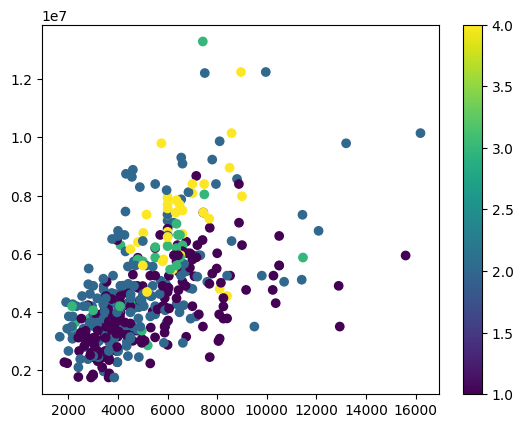

In [ ]:
plt.scatter(train_set.area, train_set.price, c=train_set.stories)
plt.colorbar();

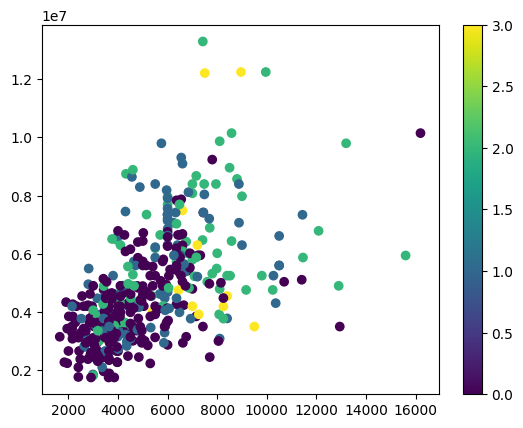

In [ ]:
plt.scatter(train_set.area, train_set.price, c=train_set.parking)
plt.colorbar();

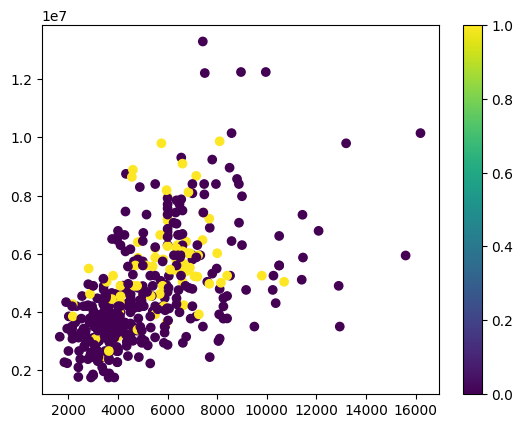

In [ ]:
plt.scatter(train_set.area, train_set.price, c=train_set.guestroom)
plt.colorbar();

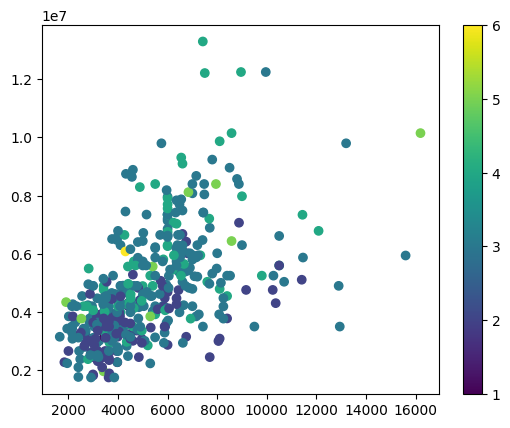

In [ ]:
plt.scatter(train_set.area, train_set.price, c=train_set.bedrooms)
plt.colorbar();

## Outliers

###Univariate analysis

####Numerical features

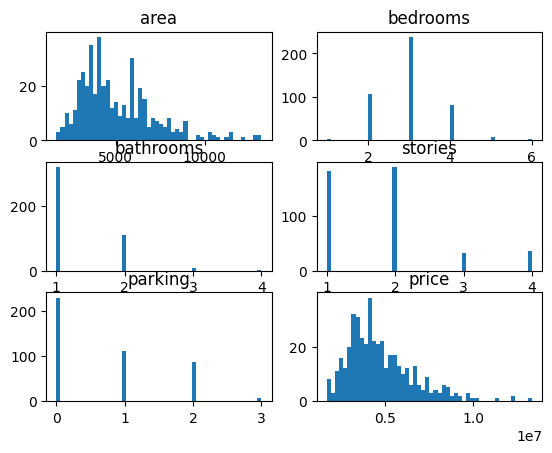

In [14]:
fig, axes = plt.subplots(3, 2)
axes_flat = axes.flatten()

for i, col in enumerate(train_set.select_dtypes('float64').columns):
  ax = axes_flat[i]
  ax.hist(train_set[col], 50)
  ax.set_title(col)

#### Analyzing the Distribution of area and its log-transformed distribution

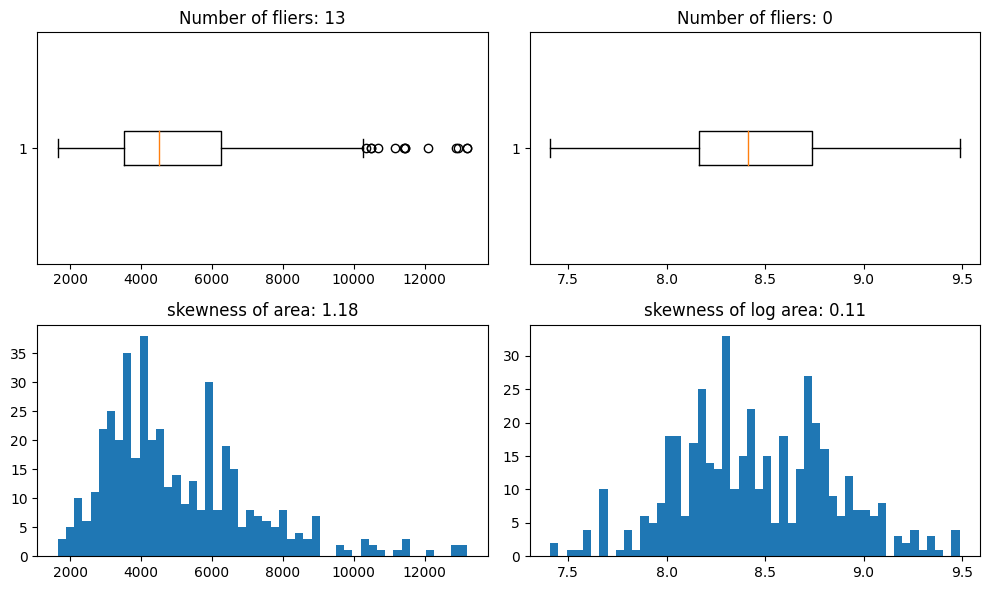

In [15]:
fig, axes = plt.subplots(2, 2, figsize=(10, 6))

# Boxplot of original area
fliers = axes[0][0].boxplot(train_set.area, vert=False, whis=1.5)['fliers'][0].get_ydata()
axes[0][0].set_title(f'Number of fliers: {len(fliers)}')

# Boxplot of log transformed area
log_area = np.log(train_set.area)
log_fliers = axes[0][1].boxplot(log_area, vert=False, whis=1.5)['fliers'][0].get_ydata()
axes[0][1].set_title(f'Number of fliers: {len(log_fliers)}')

# Histogram of original area
skewness_original = skew(train_set.area)
axes[1][0].hist(train_set.area, 50)
axes[1][0].set_title(f'skewness of area: {skewness_original:.2f}')

# Histogram of log transformed area
skewness_transformed = skew(log_area)
axes[1][1].hist(log_area, 50)
axes[1][1].set_title(f'skewness of log area: {skewness_transformed:.2f}')

plt.tight_layout()
plt.show()

#### Analyzing the Distribution of area and its BoxCox-transformed distribution

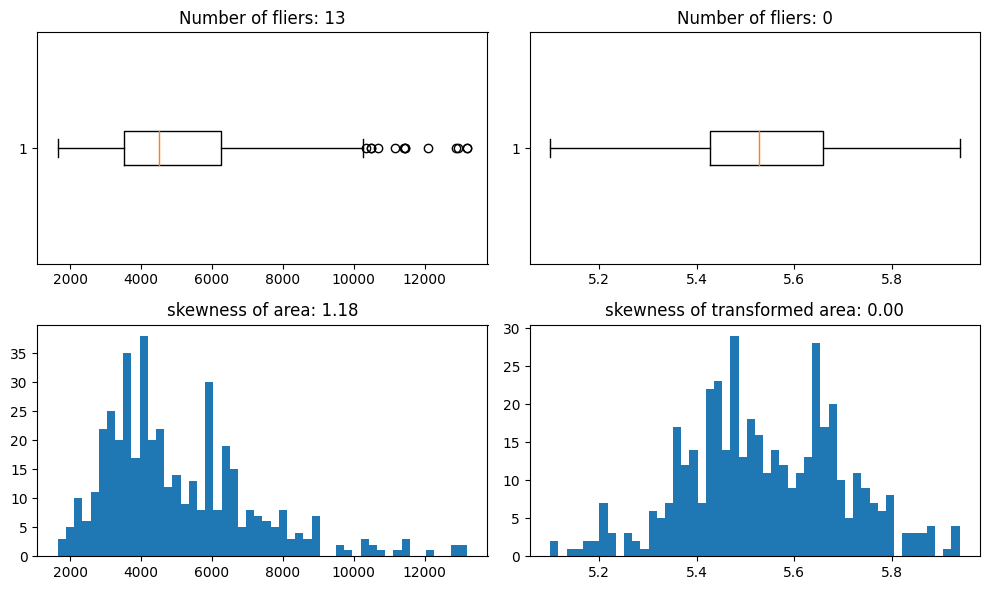

In [16]:
fig, axes = plt.subplots(2, 2, figsize=(10, 6))

# Boxplot of original area
fliers = axes[0][0].boxplot(train_set.area, vert=False, whis=1.5)['fliers'][0].get_ydata()
axes[0][0].set_title(f'Number of fliers: {len(fliers)}')

# Boxplot of transformed area
transformed_area, lambda_ = boxcox(train_set.area)
transformed_fliers = axes[0][1].boxplot(transformed_area, vert=False, whis=1.5)['fliers'][0].get_ydata()
axes[0][1].set_title(f'Number of fliers: {len(transformed_fliers)}')

# Histogram of original area
skewness_original = skew(train_set.area)
axes[1][0].hist(train_set.area, 50)
axes[1][0].set_title(f'skewness of area: {skewness_original:.2f}')

# Histogram of transformed area
skewness_transformed = skew(transformed_area)
axes[1][1].hist(transformed_area, 50)
axes[1][1].set_title(f'skewness of transformed area: {skewness_transformed:.2f}')

plt.tight_layout()
plt.show()

#### Analyzing the Distribution of area and its Yeojohnson-transformed distribution

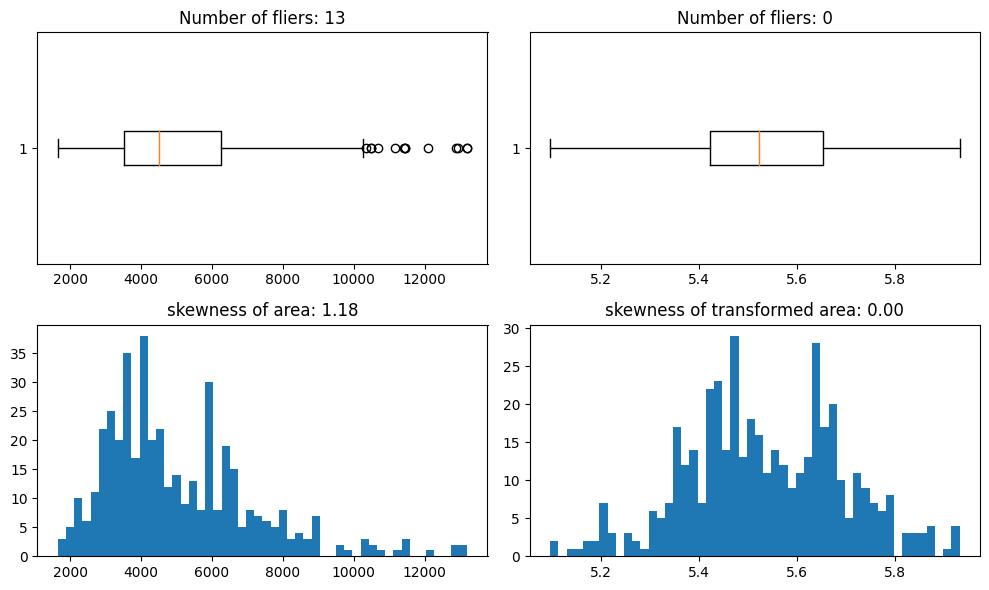

In [17]:
fig, axes = plt.subplots(2, 2, figsize=(10, 6))

# Boxplot of original area
fliers = axes[0][0].boxplot(train_set.area, vert=False, whis=1.5)['fliers'][0].get_ydata()
axes[0][0].set_title(f'Number of fliers: {len(fliers)}')

# Boxplot of transformed area
transformed_area, lambda_ = yeojohnson(train_set.area)
transformed_fliers = axes[0][1].boxplot(transformed_area, vert=False, whis=1.5)['fliers'][0].get_ydata()
axes[0][1].set_title(f'Number of fliers: {len(transformed_fliers)}')

# Histogram of original area
skewness_original = skew(train_set.area)
axes[1][0].hist(train_set.area, 50)
axes[1][0].set_title(f'skewness of area: {skewness_original:.2f}')

# Histogram of transformed area
skewness_transformed = skew(transformed_area)
axes[1][1].hist(transformed_area, 50)
axes[1][1].set_title(f'skewness of transformed area: {skewness_transformed:.2f}')

plt.tight_layout()
plt.show()

#### Analyzing the distributions of Numerical features and their Yeojohnson Transformed Distributions

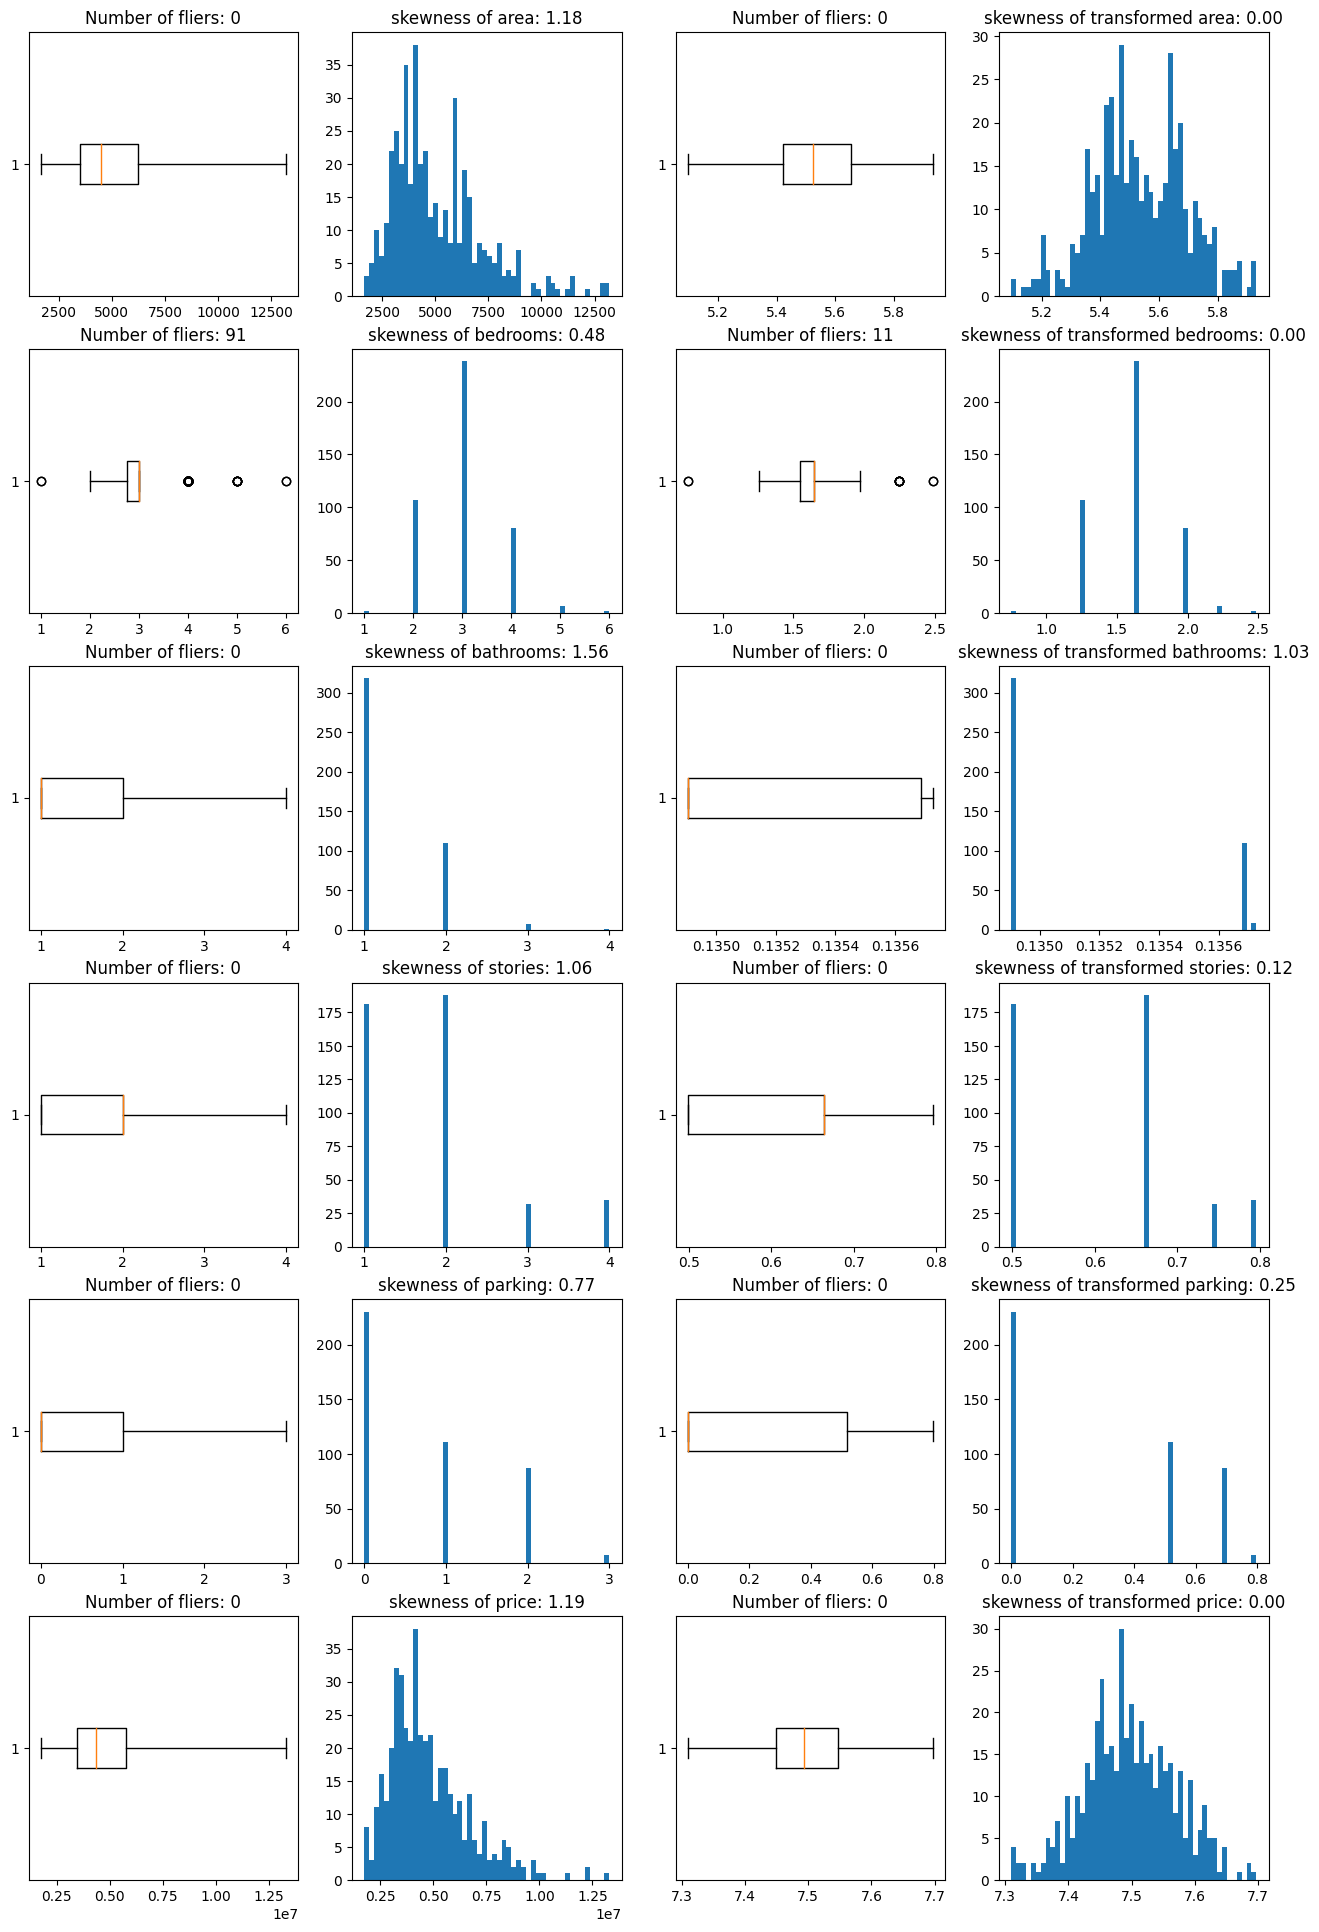

In [29]:
cols = ['area', 'bedrooms', 'bathrooms','stories', 'parking', 'price']

lambda_list = []

n_rows = len(cols)

fig, axes = plt.subplots(n_rows, 4, figsize=(16, 4 * n_rows))

for i, col in enumerate(cols):

  skewness_orig = skew(train_set[col])

  # Boxplot of original col
  fliers = axes[i][0].boxplot(train_set[col], vert=False, whis=3.5)['fliers'][0].get_ydata()
  axes[i][0].set_title(f'Number of fliers: {len(fliers)}')

  # Boxplot of transformed col
  transformed_col, lambda_ = yeojohnson(train_set[col])
  transformed_fliers = axes[i][2].boxplot(transformed_col, vert=False, whis=3.5)['fliers'][0].get_ydata()
  axes[i][2].set_title(f'Number of fliers: {len(transformed_fliers)}')
  lambda_list.append(lambda_)

  # Histogram of original col
  axes[i][1].hist(train_set[col], 50)
  axes[i][1].set_title(f'skewness of {col}: {skewness_orig:.2f}')

  # Histogram of transformed col
  skewness_transformed = skew(transformed_col)
  axes[i][3].hist(transformed_col, 50)
  axes[i][3].set_title(f'skewness of transformed {col}: {skewness_transformed:.2f}')

In [30]:
lambda_list

[-0.10816376321942683,
 0.2419987461763292,
 -7.36772178149086,
 -1.00873097312092,
 -0.886791659025384,
 -0.10772469648946992]

In [31]:
cols = ['area', 'bedrooms', 'bathrooms','stories', 'parking', 'price']
train_set2 = train_set.copy()
for col in cols:
  train_set2[col], _ = yeojohnson(train_set[col])

In [33]:
cols = ['area', 'bedrooms', 'bathrooms','stories', 'parking', 'price']
desc = train_set2[cols].describe()

Q1 = desc.loc['25%']
Q3 = desc.loc['75%']
IQR = Q3 - Q1
lower_cap = Q1 - 3.5 * IQR
upper_cap = Q3 + 3.5 * IQR

flags = (train_set2[cols] < lower_cap) | (train_set2[cols] > upper_cap)
flags.sum()

area          0
bedrooms     11
bathrooms     0
stories       0
parking       0
price         0
dtype: int64

In [34]:
(flags.sum(1) > 0).sum()

11

In [35]:
train_set2 = train_set2[~flags.sum(1).astype(np.bool_)]
train_set2

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price
451,5.683032,1.258503,0.134905,0.498663,1,0,0,0,0,-0.000000,0,1,7.430858
333,5.356544,1.647172,0.134905,0.664051,1,0,0,0,0,-0.000000,0,1,7.473979
134,5.697015,1.647172,0.134905,0.498663,1,0,1,0,0,0.701992,1,1,7.548830
248,5.485703,1.258503,0.135686,0.498663,1,1,1,0,0,-0.000000,0,1,7.502494
238,5.524252,1.967844,0.135686,0.664051,1,0,1,0,0,-0.000000,0,1,7.505424
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30,5.722119,1.647172,0.135686,0.795842,1,0,0,0,1,0.701992,0,2,7.616562
289,5.627475,1.258503,0.134905,0.498663,1,1,1,0,0,0.701992,0,1,7.487374
481,5.311990,1.258503,0.134905,0.498663,0,0,0,0,0,-0.000000,0,0,7.417041
59,5.637367,1.647172,0.135686,0.795842,1,1,0,0,1,0.517804,0,0,7.588913


### Bivatiate analysis

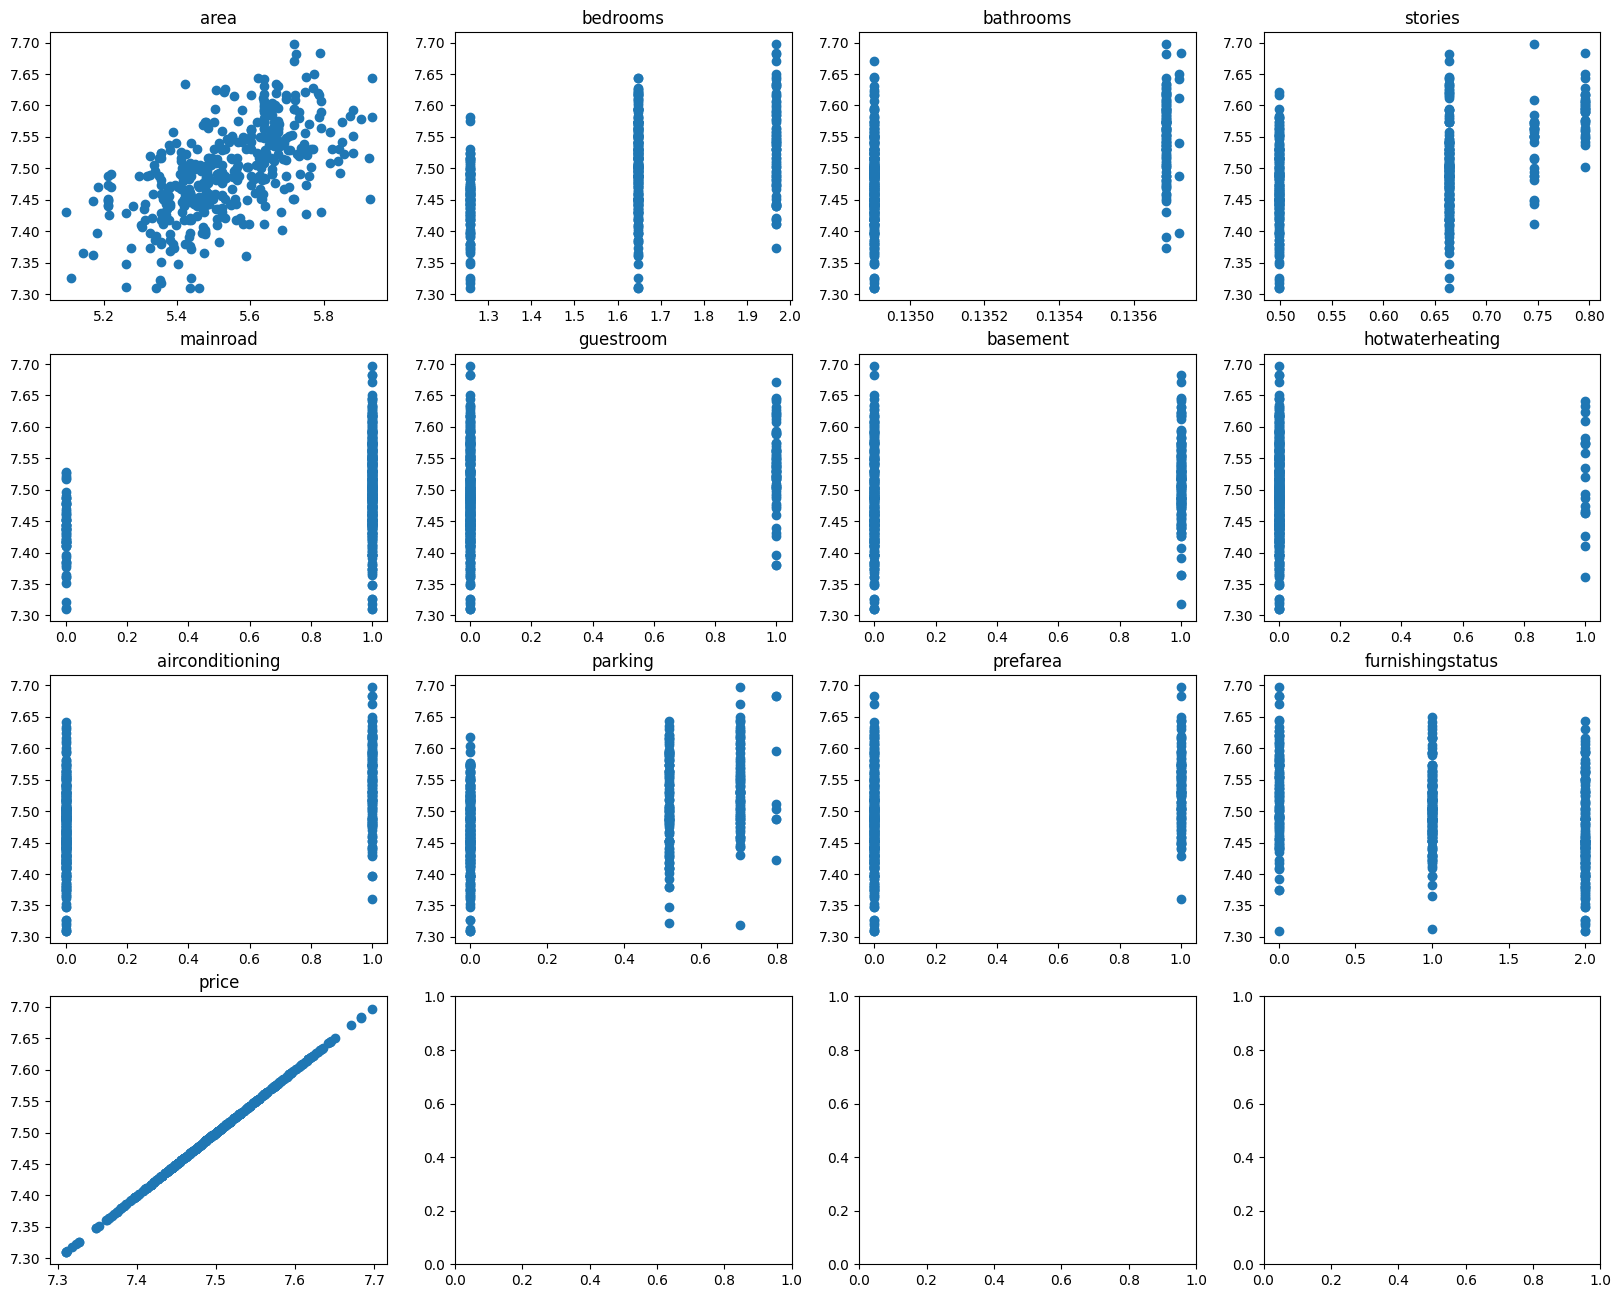

In [36]:
fig, axes = plt.subplots(4, 4, figsize=(20, 16))
axes_flat = axes.flatten()

for i, col in enumerate(train_set2.columns):
  ax = axes_flat[i]
  ax.scatter(train_set2[col], train_set2.price)
  ax.set_title(col)

## Data/Feature Reduction

In [37]:
corr = train_set2.corr()
corr[['price']].abs().sort_values(by='price')

,price
hotwaterheating,0.084463
basement,0.213420
guestroom,0.275220
prefarea,0.333589
furnishingstatus,0.348435
mainroad,0.367858
stories,0.404035
parking,0.404207
bedrooms,0.413372
airconditioning,0.455792


In [38]:
train_set2.drop(['hotwaterheating'], axis=1, inplace=True)
train_set2

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,airconditioning,parking,prefarea,furnishingstatus,price
451,5.683032,1.258503,0.134905,0.498663,1,0,0,0,-0.000000,0,1,7.430858
333,5.356544,1.647172,0.134905,0.664051,1,0,0,0,-0.000000,0,1,7.473979
134,5.697015,1.647172,0.134905,0.498663,1,0,1,0,0.701992,1,1,7.548830
248,5.485703,1.258503,0.135686,0.498663,1,1,1,0,-0.000000,0,1,7.502494
238,5.524252,1.967844,0.135686,0.664051,1,0,1,0,-0.000000,0,1,7.505424
...,...,...,...,...,...,...,...,...,...,...,...,...
30,5.722119,1.647172,0.135686,0.795842,1,0,0,1,0.701992,0,2,7.616562
289,5.627475,1.258503,0.134905,0.498663,1,1,1,0,0.701992,0,1,7.487374
481,5.311990,1.258503,0.134905,0.498663,0,0,0,0,-0.000000,0,0,7.417041
59,5.637367,1.647172,0.135686,0.795842,1,1,0,1,0.517804,0,0,7.588913


## Normalization

In [40]:
normz = MinMaxScaler()
train_set2 = normz.fit_transform(train_set2)
train_set2

array([[0.70164603, 0.        , 0.        , ..., 0.        , 0.5       ,
        0.3126239 ],
       [0.31081561, 0.54793025, 0.        , ..., 0.        , 0.5       ,
        0.42397696],
       [0.71838469, 0.54793025, 0.        , ..., 1.        , 0.5       ,
        0.61726504],
       ...,
       [0.25748106, 0.        , 0.        , ..., 0.        , 0.        ,
        0.27694598],
       [0.64698146, 0.54793025, 0.95069139, ..., 0.        , 0.        ,
        0.7207735 ],
       [0.4282963 , 0.54793025, 0.        , ..., 1.        , 1.        ,
        0.56869382]])

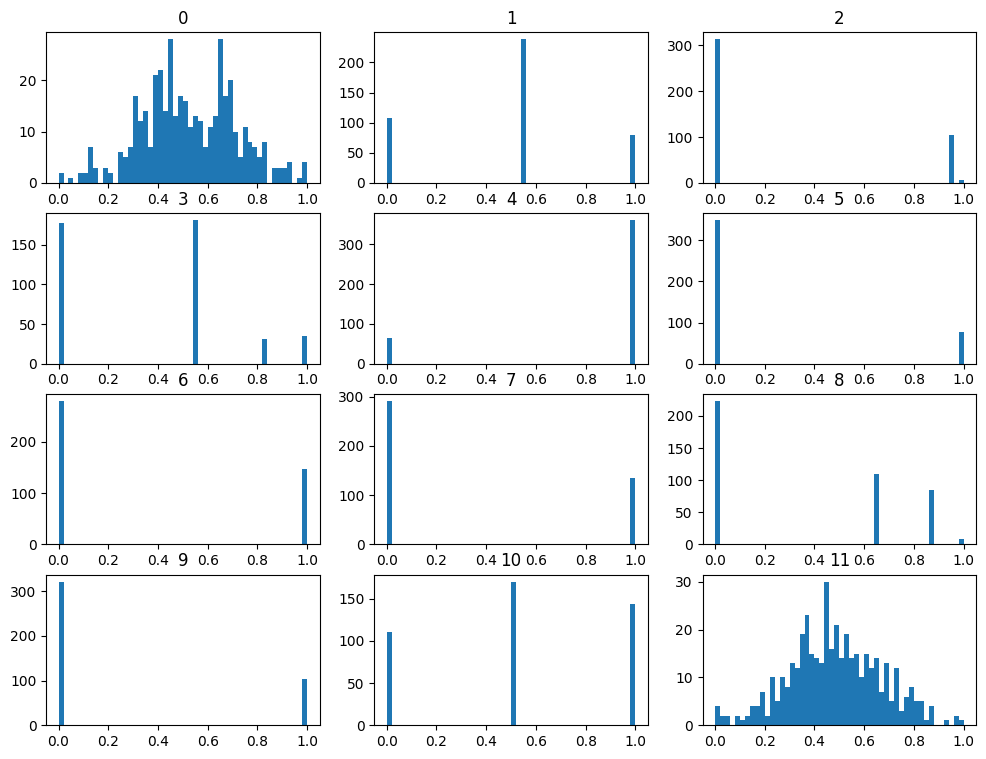

In [42]:
fig, axes = plt.subplots(4, 3, figsize=(12, 9))
axes_flat = axes.flatten()

for i, col in enumerate(range(train_set2.shape[1])):
  ax = axes_flat[i]
  ax.hist(train_set2[:, col], 50)
  ax.set_title(col)

## Model Selection

### coverting train_set to x & y

In [48]:
x_train = train_set2[:, :-1]
y_train = train_set2[:, [-1]]

x_train.shape, y_train.shape

((425, 11), (425, 1))

### SGDRegressor model initialization

In [50]:
model = SGDRegressor(random_state=2)

### Coarse Grid with RandomizedSearchCV

In [52]:
lrs = np.logspace(-3, 1, 50)
alphas = np.logspace(-6, 1, 50)
param_distr = {'eta0': lrs, 'alpha': alphas}

In [57]:
random_search = RandomizedSearchCV(model, param_distr, n_iter=250, random_state=2, cv=3)
random_search.fit(x_train, y_train.ravel())

random_search.best_params_, random_search.best_score_

({'eta0': 0.2811768697974228, 'alpha': 5.179474679231212e-06},
 0.651161597300271)

### Fine Grid with GridSearchCV

In [61]:
lr, alpha = random_search.best_params_.values()
d1, d2 = 0.15, 0.15
lrs = np.r_[np.linspace((1 - d1) * lr, (1 + d1) * lr, 100), lr]
alphas = np.r_[np.linspace((1 - d2) * lr, (1 + d2) * lr, 100), alpha]

param_grid = {'eta0': lrs, 'alpha': alphas}

In [62]:
grid_search = GridSearchCV(model, param_grid, cv=3)
grid_search.fit(x_train, y_train.ravel())

grid_search.best_params_, grid_search.best_score_

({'alpha': 5.179474679231212e-06, 'eta0': 0.26711802630755166},
 0.6512002677738823)

### Best Model

In [64]:
model = grid_search.best_estimator_

In [65]:
joblib.dump(model, 'best_model.pkl')

['best_model.pkl']

## Test

In [66]:
test_set

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price
243,2550.0,3.0,1.0,2.0,yes,no,yes,no,no,0.0,no,furnished,4550000.0
157,2817.0,4.0,2.0,2.0,no,yes,yes,no,no,1.0,no,furnished,5495000.0
536,3420.0,5.0,1.0,2.0,no,no,no,no,no,0.0,no,unfurnished,1960000.0
90,5000.0,3.0,1.0,2.0,yes,no,no,no,yes,0.0,no,semi-furnished,6440000.0
92,4800.0,3.0,2.0,4.0,yes,yes,no,no,yes,0.0,no,furnished,6405000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,4800.0,2.0,1.0,1.0,yes,yes,yes,no,no,0.0,no,semi-furnished,5033000.0
223,6321.0,3.0,1.0,2.0,yes,no,yes,no,yes,1.0,no,furnished,4760000.0
467,3240.0,3.0,1.0,2.0,yes,no,no,no,no,2.0,no,semi-furnished,3010000.0
21,7155.0,3.0,2.0,1.0,yes,yes,yes,no,yes,2.0,no,unfurnished,8680000.0


### Missing values

In [67]:
test_set.isna().sum()

area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
price               0
dtype: int64

### Encoding Categorical Features

In [68]:
cols = ['guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
test_set['mainroad'] = label_encoder.fit_transform(test_set['mainroad'])
for col in cols:
  test_set[col] = label_encoder.transform(test_set[col])

In [69]:
test_set['furnishingstatus'] = label_encoder.fit_transform(test_set['furnishingstatus'])

In [70]:
test_set

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price
243,2550.0,3.0,1.0,2.0,1,0,1,0,0,0.0,0,0,4550000.0
157,2817.0,4.0,2.0,2.0,0,1,1,0,0,1.0,0,0,5495000.0
536,3420.0,5.0,1.0,2.0,0,0,0,0,0,0.0,0,2,1960000.0
90,5000.0,3.0,1.0,2.0,1,0,0,0,1,0.0,0,1,6440000.0
92,4800.0,3.0,2.0,4.0,1,1,0,0,1,0.0,0,0,6405000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,4800.0,2.0,1.0,1.0,1,1,1,0,0,0.0,0,1,5033000.0
223,6321.0,3.0,1.0,2.0,1,0,1,0,1,1.0,0,0,4760000.0
467,3240.0,3.0,1.0,2.0,1,0,0,0,0,2.0,0,1,3010000.0
21,7155.0,3.0,2.0,1.0,1,1,1,0,1,2.0,0,2,8680000.0


### Data/Feature Reduction

In [72]:
test_set.drop(columns=['hotwaterheating'], inplace=True)
test_set

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,airconditioning,parking,prefarea,furnishingstatus,price
243,2550.0,3.0,1.0,2.0,1,0,1,0,0.0,0,0,4550000.0
157,2817.0,4.0,2.0,2.0,0,1,1,0,1.0,0,0,5495000.0
536,3420.0,5.0,1.0,2.0,0,0,0,0,0.0,0,2,1960000.0
90,5000.0,3.0,1.0,2.0,1,0,0,1,0.0,0,1,6440000.0
92,4800.0,3.0,2.0,4.0,1,1,0,1,0.0,0,0,6405000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
193,4800.0,2.0,1.0,1.0,1,1,1,0,0.0,0,1,5033000.0
223,6321.0,3.0,1.0,2.0,1,0,1,1,1.0,0,0,4760000.0
467,3240.0,3.0,1.0,2.0,1,0,0,0,2.0,0,1,3010000.0
21,7155.0,3.0,2.0,1.0,1,1,1,1,2.0,0,2,8680000.0


### Feature Transform

In [74]:
cols = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']
for i, col in enumerate(cols):
  test_set[col] = yeojohnson(test_set[col], lambda_list[i])

test_set

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,airconditioning,parking,prefarea,furnishingstatus,price
243,5.287607,1.647172,0.134905,0.664051,1,0,1,0,-0.000000,0,0,7.502789
157,5.329989,1.967844,0.135686,0.664051,0,1,1,0,0.517804,0,0,7.538612
536,5.411251,2.243016,0.134905,0.664051,0,0,0,0,-0.000000,0,2,7.333736
90,5.565524,1.647172,0.134905,0.664051,1,0,0,1,-0.000000,0,1,7.568177
92,5.549244,1.647172,0.135686,0.795842,1,1,0,1,-0.000000,0,0,7.567170
...,...,...,...,...,...,...,...,...,...,...,...,...
193,5.549244,1.258503,0.134905,0.498663,1,1,1,0,-0.000000,0,1,7.522032
223,5.657645,1.647172,0.134905,0.664051,1,0,1,1,0.517804,0,0,7.511421
467,5.388770,1.647172,0.134905,0.664051,1,0,0,0,0.701992,0,1,7.421765
21,5.705409,1.647172,0.135686,0.498663,1,1,1,1,0.701992,0,2,7.622438


### Data Normalization

In [75]:
test_set = normz.transform(test_set)
test_set

array([[0.22829254, 0.54793025, 0.        , ..., 0.        , 0.        ,
        0.49837432],
       [0.27902771, 1.        , 0.95069139, ..., 0.        , 0.        ,
        0.59087989],
       [0.3763039 , 1.38792567, 0.        , ..., 0.        , 1.        ,
        0.06182597],
       ...,
       [0.34939302, 0.54793025, 0.        , ..., 0.        , 0.5       ,
        0.28914399],
       [0.72843335, 0.54793025, 0.95069139, ..., 0.        , 1.        ,
        0.80734477],
       [0.57687894, 0.54793025, 0.        , ..., 0.        , 0.5       ,
        0.51335693]])

### Coverting test_set to x & y

In [76]:
x_test = test_set[:, :-1]
y_test = test_set[:, [-1]]

x_test.shape, y_test.shape

((109, 11), (109, 1))

### Load Model

In [77]:
model = joblib.load('best_model.pkl')
model.coef_

array([ 0.30258379,  0.0275524 ,  0.07338071,  0.10878211,  0.04698324,
        0.0190408 ,  0.04298167,  0.07296989,  0.06442538,  0.0591613 ,
       -0.04795257])

### Test

In [78]:
model.score(x_test, y_test)

0.6067642793613279